In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bike_df = pd.read_csv('bike_train.csv')

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [7]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [15]:
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

In [16]:
bike_df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1


In [18]:
bike_df.drop(columns=['datetime', 'casual', 'registered'], inplace=True)

In [19]:
bike_df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return mean_squared_error(y, pred, squared=False)

def evaluate_regr(y, pred):
    print(f'rmsle:{rmsle(y, pred)}, rmse:{rmse(y, pred)}, mae:{mean_absolute_error(y, pred)}')

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings

In [54]:
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [55]:
x = bike_df.drop(columns=['count'])
y = bike_df['count']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)
evaluate_regr(y_test, pred)

rmsle:1.1646636237113677, rmse:140.89958867165495, mae:105.9244483509981


In [56]:
def get_top_error_data(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot: >

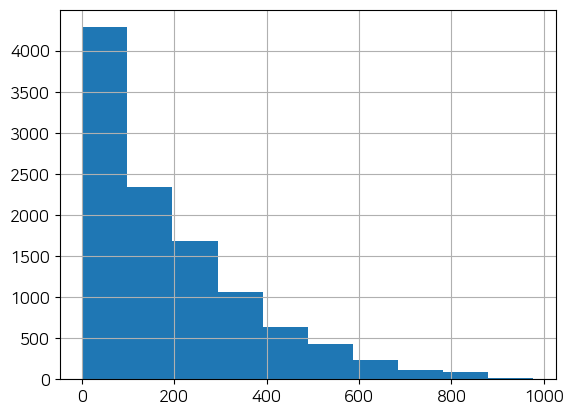

In [42]:
y.hist()

<AxesSubplot: >

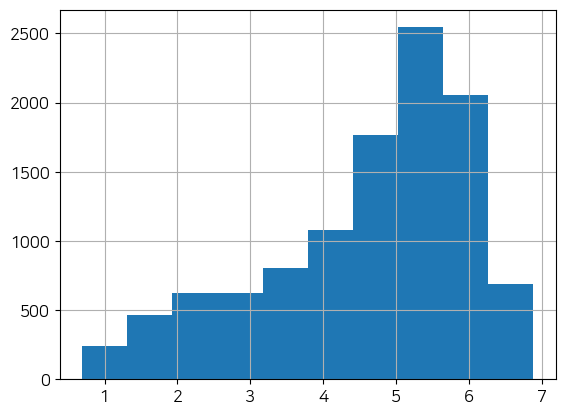

In [75]:
y_log = np.log1p(y)
y_log.hist()

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)


y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)
# rmsle:1.1646636237113677, rmse:140.89958867165495, mae:105.924448350998

rmsle:1.0168265982003486, rmse:162.59426809004785, mae:109.28615860077622


In [67]:
d1 = 324
d1_log = np.log1p(d1)
d1_log

5.783825182329737

In [50]:
np.expm1(d1_log)

323.99999999999994

<AxesSubplot: >

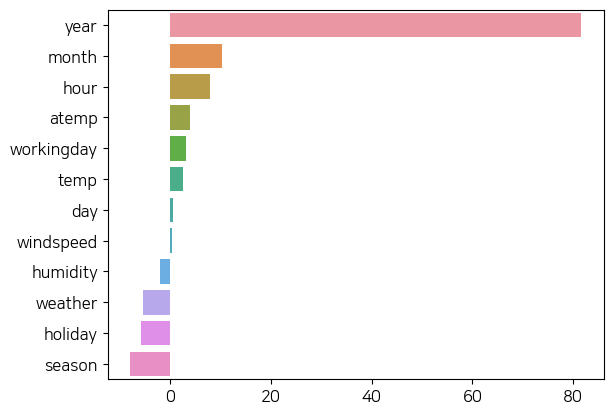

In [60]:
coef = pd.Series(lr_reg.coef_, index = x.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index )

In [66]:
bike_df.year.value_counts()

year
2012    5464
2011    5422
Name: count, dtype: int64

In [71]:
## 숫자형 카테고리값을 선형회귀에 사용할경우 숫자형 값에 크게 영향 받음
## 때문에 선형 회귀 -->> 이런 피저 인코딩에 원-핫 인코딩 적용해 변환해야함

In [82]:
x_ohe = pd.get_dummies(x, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'],dtype='int')

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x_ohe, y_log, test_size=0.3, random_state=0)

def get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=False):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('####', model.__class__.__name__, '####')
    evaluate_regr(y_test, pred)
    
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=True)

#### LinearRegression ####
rmsle:0.5896341249987279, rmse:97.68772605665559, mae:63.38195402841094
#### Ridge ####
rmsle:0.5901367703437249, rmse:98.52859077604568, mae:63.89335277110794
#### Lasso ####
rmsle:0.6347518077052987, rmse:113.21881019147777, mae:72.80270669734965


<AxesSubplot: >

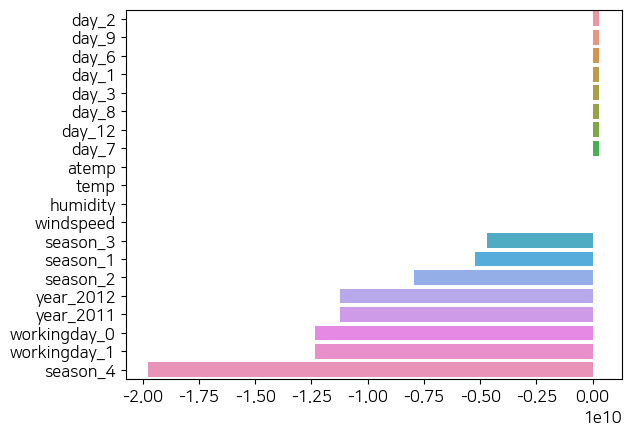

In [86]:
coef = pd.Series(lr_reg.coef_, index = x_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[-20:]
sns.barplot(x=coef_sort.values, y=coef_sort.index )